<a href="https://colab.research.google.com/github/arnabdas29/image-processing/blob/master/cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRO TO DENSE NETWORKS


In [0]:
from google.colab import drive
path = drive.mount('/content/drive')
import os
print(os.listdir(path))

path = "./drive/My Drive/DL_Workshop/"
print(os.listdir(path))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['.config', 'drive', 'sample_data']
['FASHION MNIST', 'imgs_clipped_new', 'cifar-10-batches-py', 'filters.png', 'padding.png', 'overfit.PNG', 'Fashion MNIST.ipynb', 'fashion-mnist_test.csv', 'fashion-mnist_train.csv', 'kernel.png', 'dense.png', 'cifar.ipynb']


![](https://drive.google.com/uc?id=1X-KdNLfLX5M3KgtXyWFTx6AkUN0tMYG2)

In [0]:
from keras.datasets import mnist
import numpy as np

(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### we need to normalize the dataset

In [0]:
xtrain, xtest = np.array(xtrain), np.array(xtest)

xtrain = xtrain/255
xtest = xtest/255



### visualising the dataset: 

3
6
6
4
4


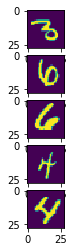

In [0]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.subplot(5,1,i+1)
    _ = np.random.randint(1000)
    plt.imshow(xtrain[_])
    print(ytrain[_])
    

### changing the data shape:

In [0]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], xtrain.shape[2], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], xtest.shape[2], 1)

print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### creating a neural network

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.activations import sigmoid, tanh
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy

model = Sequential()

model.add(Dense(100, input_shape=(28,28,1), activation = "tanh"))
model.add(Flatten())
model.add(Dense(200, activation = "tanh"))
model.add(Dense(300, activation = "tanh"))
model.add(Dense(200, activation = "tanh"))
model.add(Dense(100, activation = "tanh"))
model.add(Dense(10, activation = "softmax"))

model.compile(SGD(), loss = "categorical_crossentropy", metrics = ["acc"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 28, 28, 100)       200       
_________________________________________________________________
flatten_3 (Flatten)          (None, 78400)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 200)               15680200  
_________________________________________________________________
dense_15 (Dense)             (None, 300)               60300     
_________________________________________________________________
dense_16 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

### WE NEED TO MAKE THE LABELS CATEGORICAL:

In [0]:
from keras.utils import np_utils

print("sparse categorical", ytrain[:10], sep="\n")
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)
print("categorical", ytrain[:10], sep = "\n")

sparse categorical
[5 0 4 1 9 2 1 3 1 4]
categorical
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [0]:
model.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 5, verbose = 2, batch_size = 100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 8s - loss: 0.5788 - acc: 0.8643 - val_loss: 0.3340 - val_acc: 0.9086
Epoch 2/5
 - 8s - loss: 0.3099 - acc: 0.9126 - val_loss: 0.2768 - val_acc: 0.9223
Epoch 3/5
 - 8s - loss: 0.2666 - acc: 0.9234 - val_loss: 0.2453 - val_acc: 0.9300
Epoch 4/5
 - 8s - loss: 0.2375 - acc: 0.9310 - val_loss: 0.2261 - val_acc: 0.9339
Epoch 5/5
 - 8s - loss: 0.2124 - acc: 0.9389 - val_loss: 0.2004 - val_acc: 0.9417


# Increase in accuracy with reduction of parameters?

look at this network's results



# INTRODUCTION TO CONVOLUTION NEURAL NETWORKS

## what is convolution nets:
To understand this we need to know what are kernel and filters
## what is a kernel?


![alt text](https://drive.google.com/uc?id=1Qvv2krSo1e10naQhmBoPnoZYePEeAsxx)
## what is a filter?


<img src="filters.png" alt="Alt text that describes the graphic" title="Title text" />

## what is padding?

<img src="padding.png" alt="Alt text that describes the graphic" title="Title text" />

In the forward pass, you will take many filters and convolve them on the input. Each 'convolution' gives you a 2D matrix output. You will then stack these outputs to get a 3D volume:



The formulas relating the output shape of the convolution to the input shape is:$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$$$ n_C = \text{number of filters used in the convolution}$$

## why do we need convolutional networks?
- they are very good at feature extraction
- we can build encode-decoder networks
- they can be used to not only in images but also in sound signals
- they can be used for dimention reduction


## visualizing the convolutional networks:

<a href="https://cs.stanford.edu/people/karpathy/convnetjs/demo/mnist.html">Visualization</a>

In [0]:
from google.colab import drive
path = drive.mount('/content/drive')
import os
print(os.listdir(path))

path = path + "/cifar-10-batches-py/"
print(os.listdir(path))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['.config', 'drive', 'sample_data']


TypeError: ignored

In [0]:
import numpy as np
import pickle
import os
from keras.utils import np_utils


print("files present in that path",os.listdir(path), sep = "\n", end="\n\n")

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding = "latin1")
    return dict

imgs = []
labels = []
for file in os.listdir(path):
    if file.split("_")[0] == "data":
        file = unpickle(path + file)
        imgs.extend(file["data"].reshape(10000,32,32,3)/255.0)
        labels.extend(file["labels"])
        

files present in that path
['.config', 'drive', 'sample_data']



### The above code is used for unpickling the dataset

### The below code is used to reshape the arrays

In [0]:
        
imgs = np.array(imgs)
imgs = imgs-0.5
labels = np.array(labels)
print("shape of the input images", imgs.shape, sep ="\n")
imgs = imgs.reshape(50000,32,32,3)
labels = labels.reshape(50000,1)

shape of the input images
(50000, 32, 32, 3)


## converting the labels into categorical format

In [0]:
print("shape of the labels - sparse categorical format",labels.shape, sep = "\n")
labels = np_utils.to_categorical(labels,10)
print("shape of the labels - categorical format",labels.shape, sep="\n", end="\n\n")

shape of the labels - sparse categorical format
(50000, 1)
shape of the labels - categorical format
(50000, 10)



In [0]:
print("sample labels",labels[:3], sep = "\n")

sample labels
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Creating the model




In [0]:
import keras
from keras.layers import Dense, Conv2D, Flatten
from keras.activations import relu, sigmoid
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import MaxPooling2D

def conv(model, filters, kernel, stride):
    model.add(Conv2D(filters, kernel_size = kernel, strides = stride, activation = "relu"))
    
model = Sequential()


model.add(Conv2D(16, kernel_size = (3,3), strides = 1, activation = "relu", input_shape = (32,32,3)))

conv(model, 32, (3,3), 1)
model.add(MaxPooling2D(1,1))

conv(model, 64, (3,3), 1)
model.add(MaxPooling2D(1,1))

model.add(Flatten())

model.add(Dense(100, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

model.compile(Adam(), metrics = ["accuracy"], loss = "categorical_crossentropy")
model.summary()



W0206 21:56:33.812302  1332 deprecation_wrapper.py:119] From c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)              

In [0]:
stats = model.fit(imgs[:45000], labels[:45000], validation_data = (imgs[45000:], labels[45000:]), epochs = 20, verbose = 2, batch_size = 1000, shuffle = True)

W0206 21:56:39.571358  1332 deprecation_wrapper.py:119] From c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 8s - loss: 1.7547 - accuracy: 0.3805 - val_loss: 1.4733 - val_accuracy: 0.4786
Epoch 2/20
 - 6s - loss: 1.3746 - accuracy: 0.5202 - val_loss: 1.3244 - val_accuracy: 0.5330
Epoch 3/20
 - 6s - loss: 1.2353 - accuracy: 0.5695 - val_loss: 1.2344 - val_accuracy: 0.5614
Epoch 4/20
 - 6s - loss: 1.1064 - accuracy: 0.6166 - val_loss: 1.1732 - val_accuracy: 0.5924
Epoch 5/20
 - 6s - loss: 1.0092 - accuracy: 0.6536 - val_loss: 1.1350 - val_accuracy: 0.6006
Epoch 6/20
 - 6s - loss: 0.9241 - accuracy: 0.6869 - val_loss: 1.0815 - val_accuracy: 0.6320
Epoch 7/20
 - 6s - loss: 0.8272 - accuracy: 0.7201 - val_loss: 1.0619 - val_accuracy: 0.6354
Epoch 8/20
 - 6s - loss: 0.7444 - accuracy: 0.7502 - val_loss: 1.0715 - val_accuracy: 0.6350
Epoch 9/20
 - 6s - loss: 0.6778 - accuracy: 0.7720 - val_loss: 1.0866 - val_accuracy: 0.6350
Epoch 10/20
 - 6s - loss: 0.5996 - accuracy: 0.8026 - val_loss: 1.0949 - val_accuracy: 0.6370
Epoch 11/20
 - 6s - 

# error analysis:
### loss high and val_loss high = underfitting
### loss low and val_loss high = overfitting
### loss low and val_loss low = good job:)

<img src="overfit.png" alt="Alt text that describes the graphic" title="Title text" />



## To check the performance of the model:

Text(0.5, 1.0, 'validation loss')

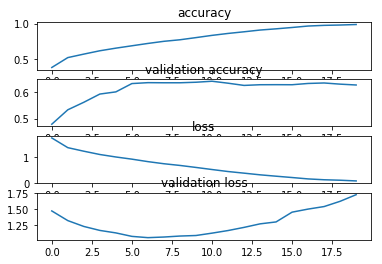

In [0]:
import matplotlib.pyplot as plt

plt.subplot(411)
plt.plot(stats.history["accuracy"])
plt.title("accuracy")

plt.subplot(412)
plt.plot(stats.history["val_accuracy"])
plt.title("validation accuracy")

plt.subplot(413)
plt.plot(stats.history["loss"])
plt.title("loss")

plt.subplot(414)
plt.plot(stats.history["val_loss"])
plt.title("validation loss")

In [0]:
import keras
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D
from keras.activations import relu, sigmoid
from keras.optimizers import Adam, SGD
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(16, kernel_size = (3,3), strides = 1, activation = "relu", padding = "same", input_shape = (32,32,3)))
model.add(Conv2D(16, kernel_size = (3,3), strides = 1, activation = "relu", padding = "same"))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(32, kernel_size = (3,3), strides = 1, activation = "relu", padding="same"))
model.add(Conv2D(64, kernel_size = (3,3), strides = 1, activation = "relu", padding= "valid"))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.3))

model.add(Dense(10, activation = "softmax"))

model.compile(Adam(lr=0.005), metrics = ["acc"], loss = "categorical_crossentropy")

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)         

In [0]:
stats = model.fit(imgs[:45000], labels[:45000], validation_data = (imgs[45000:], labels[45000:]), epochs = 20, verbose = 2, batch_size = 1000, shuffle = True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 4s - loss: 2.0162 - acc: 0.2621 - val_loss: 1.7485 - val_acc: 0.3684
Epoch 2/20
 - 4s - loss: 1.6579 - acc: 0.4002 - val_loss: 1.4955 - val_acc: 0.4494
Epoch 3/20
 - 4s - loss: 1.5404 - acc: 0.4462 - val_loss: 1.4291 - val_acc: 0.4764
Epoch 4/20
 - 4s - loss: 1.4482 - acc: 0.4798 - val_loss: 1.3025 - val_acc: 0.5230
Epoch 5/20
 - 4s - loss: 1.3855 - acc: 0.5022 - val_loss: 1.2756 - val_acc: 0.5396
Epoch 6/20
 - 4s - loss: 1.3332 - acc: 0.5228 - val_loss: 1.2130 - val_acc: 0.5602
Epoch 7/20
 - 4s - loss: 1.2963 - acc: 0.5399 - val_loss: 1.1572 - val_acc: 0.5822
Epoch 8/20
 - 4s - loss: 1.2629 - acc: 0.5508 - val_loss: 1.1495 - val_acc: 0.5900
Epoch 9/20
 - 4s - loss: 1.2323 - acc: 0.5624 - val_loss: 1.1486 - val_acc: 0.5858
Epoch 10/20
 - 4s - loss: 1.2140 - acc: 0.5708 - val_loss: 1.1162 - val_acc: 0.5980
Epoch 11/20
 - 4s - loss: 1.1934 - acc: 0.5764 - val_loss: 1.1076 - val_acc: 0.6008
Epoch 12/20
 - 4s - loss: 1.1736 - a

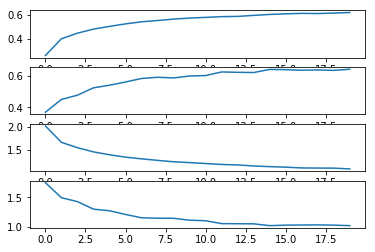

In [0]:
import matplotlib.pyplot as plt

plt.subplot(411)
plt.plot(stats.history["acc"])

plt.subplot(412)
plt.plot(stats.history["val_acc"])

plt.subplot(413)
plt.plot(stats.history["loss"])   

plt.subplot(414)
plt.plot(stats.history["val_loss"])

In [0]:
model.evaluate

<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x000001F9A34FAFD0>>

## What increases the training speed of the neural netowrk?

- batch size
- epochs
- number of parameters
- training data size

In [0]:
from keras import regularizers
from keras.layers import Activation
from keras.losses import categorical_crossentropy


weight_decay = 2e-4
num_classes = 10

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32,32,3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer= regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

stats = model.compile(Adam(), loss = "categorical_crossentropy", metrics = ["acc"])

NameError: ignored

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler


datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(imgs[:45000])

batch_size= 100

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

status = model.fit_generator(datagen.flow(imgs[:45000], labels[:45000], batch_size=batch_size),\
                    steps_per_epoch=imgs.shape[0] // batch_size,epochs=125,\
                    verbose=2,validation_data=(imgs[45000:],labels[45000:]),callbacks=[LearningRateScheduler(lr_schedule)])

ValueError: ignored

Text(0.5, 1.0, 'validation accurcay')

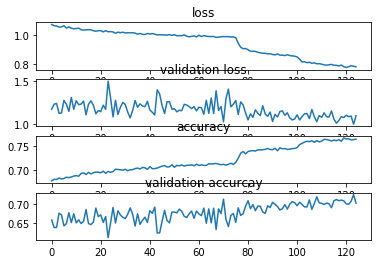

In [0]:
import matplotlib.pyplot as plt

plt.subplot(411)
plt.plot(status.history["loss"])
plt.title("loss")

plt.subplot(412)
plt.plot(status.history["val_loss"])
plt.title("validation loss")

plt.subplot(413)
plt.plot(status.history["acc"])
plt.title("accuracy")

plt.subplot(414)
plt.plot(status.history["val_acc"])
plt.title("validation accurcay")

# moving on to a little challenging dataset

This dataset has 120 classes of different breeds of dogs with ~180 images each

### Importing the necessary libraries

In [0]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

### Getting the dataset ready

In [0]:
# Standardize images across the dataset, mean=0, stdev=1
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

batch_size = 50

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
         path + "imgs_clipped_new/train",  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
        color_mode = "grayscale",
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        path + "imgs_clipped_new/valid",
        target_size=(224, 224),
        batch_size=batch_size,
        color_mode = "grayscale",
        class_mode='categorical')

Found 1161 images belonging to 10 classes.
Found 371 images belonging to 10 classes.


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(390, 460, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation = "relu"))
model.add(Dense(512, activation = "relu"))
model.add(Dense(128, activation = "relu"))

model.add(Conv2D(128, kernel_size = (3,3), activation = "relu"))

model.add(Flatten())

model.add(Dense(200, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 388, 458, 32)      320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 194, 229, 32)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 194, 229, 32)      128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 192, 227, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 96, 113, 64)       0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 96, 113, 64)       256       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 94, 111, 64)      

In [0]:
model.compile(Adam(), loss = "categorical_crossentropy", metrics = ["acc"])


In [0]:
model.fit_generator(
        train_generator,
        steps_per_epoch=1,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=1,
        verbose = 2)

Epoch 1/20
 - 2s - loss: 2.2962 - acc: 0.2200 - val_loss: 2.3023 - val_acc: 0.0800
Epoch 2/20
 - 1s - loss: 2.3467 - acc: 0.0200 - val_loss: 2.3000 - val_acc: 0.1000
Epoch 3/20
 - 1s - loss: 2.2627 - acc: 0.0400 - val_loss: 2.3000 - val_acc: 0.1000
Epoch 4/20
 - 1s - loss: 2.3093 - acc: 0.0800 - val_loss: 2.3008 - val_acc: 0.1600
Epoch 5/20
 - 1s - loss: 2.2828 - acc: 0.1800 - val_loss: 2.3060 - val_acc: 0.0800
Epoch 6/20
 - 1s - loss: 2.2667 - acc: 0.1600 - val_loss: 2.2995 - val_acc: 0.1000
Epoch 7/20
 - 1s - loss: 2.2965 - acc: 0.1200 - val_loss: 2.2954 - val_acc: 0.1800
Epoch 8/20
 - 1s - loss: 2.1631 - acc: 0.3000 - val_loss: 2.3014 - val_acc: 0.1429
Epoch 9/20
 - 1s - loss: 2.2038 - acc: 0.1600 - val_loss: 2.2902 - val_acc: 0.1600
Epoch 10/20
 - 1s - loss: 2.3027 - acc: 0.1400 - val_loss: 2.3040 - val_acc: 0.1200
Epoch 11/20
 - 1s - loss: 2.2195 - acc: 0.2000 - val_loss: 2.3158 - val_acc: 0.1000
Epoch 12/20
 - 1s - loss: 2.0166 - acc: 0.3200 - val_loss: 2.3402 - val_acc: 0.0400
E

# Transfer Learning

In [0]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

## defining our model

the mobilenet will has 1000 output classes, we need to eliminate the last layer 

In [0]:
base_model=MobileNet(weights='imagenet',include_top=False) 

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(10,activation='softmax')(x) 



/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 0s 0us/step


In [0]:
model=Model(inputs=base_model.input,outputs=preds)


In [0]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_1
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [0]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True
    

## since we are using a pre trained model we need to make sure the input dimentions are the same 

In [0]:
model.compile(Adam(), loss = "categorical_crossentropy", metrics = ["acc"])

model.fit_generator(
        train_generator,
        steps_per_epoch=1,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=1,
        verbose = 2)


NameError: ignored